In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import sys
sys.path.append('/content/drive/MyDrive/deliverables/code/helper') #update path needed

In [38]:
import pandas as pd
import numpy as np
from fixed_effect import HolidayDataProcessor, SalesDataProcessor
from data_prep import CreditDataProcessor
from train_test import DataSplitter, SARIMAXModel, NewModel, ProphetModel
from anomaly_detection import AnomalyDetection
from sklearn.metrics import mean_squared_error
import warnings
from prophet import Prophet
import cmdstanpy

cmdstanpy.install_cmdstan(compiler=True)

# To suppress all warnings (not recommended)
warnings.filterwarnings("ignore")

Installing CmdStan version: 2.32.2
Install directory: /root/.cmdstan
CmdStan version 2.32.2 already installed


In [39]:
holidays_df = HolidayDataProcessor(2016, 2023).get_holidays_dataframe()
holidays_df = holidays_df.reset_index()
sales_df = SalesDataProcessor(2016, 2023).get_sales_df()

In [40]:
file_path = "/content/drive/MyDrive/deliverables/code/data/data4columbia_credit.csv" #update path needed
company_code = "22328d65a8ae"
train_ratio = 0.8

data_processor = CreditDataProcessor(file_path, train_ratio)
data_processor.load_data()
data_processor.get_company_data(company_code)

In [41]:
train = data_processor.train
test = data_processor.test

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_7wd9qu9/ld8u46xx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_7wd9qu9/4vql86oh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20409', 'data', 'file=/tmp/tmp_7wd9qu9/ld8u46xx.json', 'init=/tmp/tmp_7wd9qu9/4vql86oh.json', 'output', 'file=/tmp/tmp_7wd9qu9/prophet_modelrr8z82o2/prophet_model-20230831160347.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:03:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:03:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


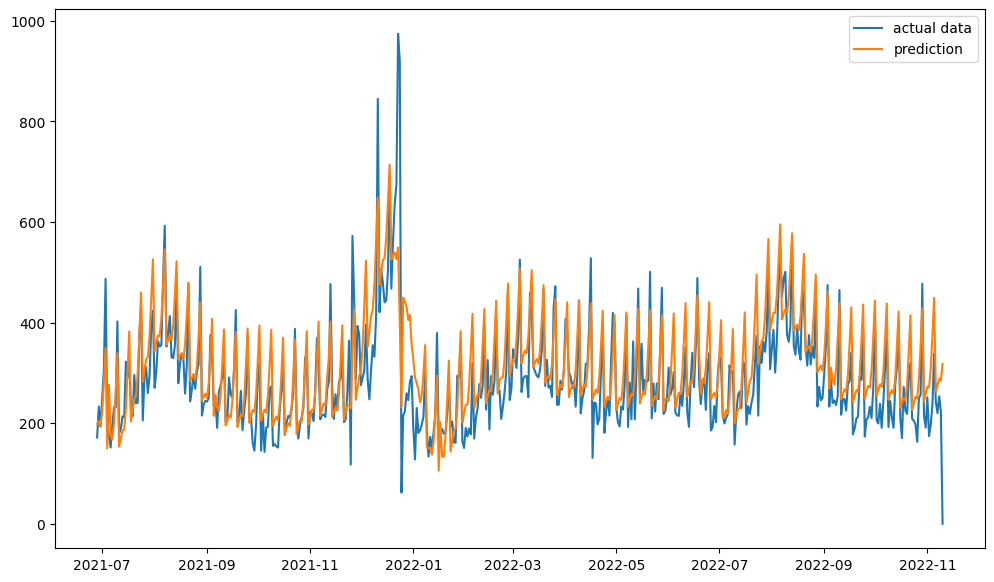

Mean Squared Error 4823.846856011816


In [42]:
time_series_forecast = ProphetModel(holidays_df, train_ratio)
time_series_forecast.fit(train)
time_series_forecast.predict(train, test)
time_series_forecast.plot_results()
mse = time_series_forecast.calculate_mse()
print("Mean Squared Error", mse)

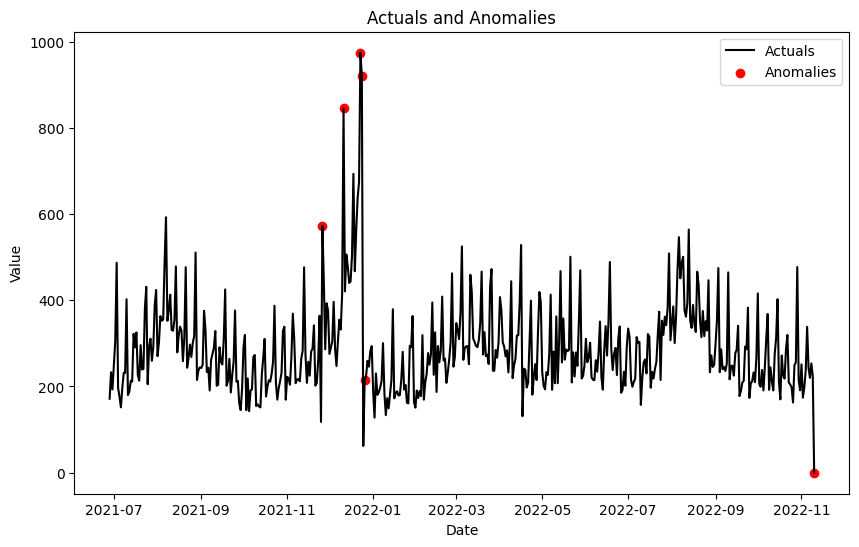

In [43]:
anomaly = AnomalyDetection(time_series_forecast.eval_df)
anomaly.detect_anomalies()
anomaly.plot_anomalies()